In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

a=pd.read_csv('/Users/gujiajun/Downloads/nifty.csv',index_col=0,parse_dates=True)


In [23]:
nifty=pd.read_csv('/Users/gujiajun/Downloads/nifty.csv', index_col=0, parse_dates=True
                )

In [37]:
nifty

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2002-04-01,1138.95,1129.85,1143.30,1129.85,41.46M,0.83%
2003-04-01,984.30,977.40,992.05,973.50,50.07M,0.62%
2004-04-01,1819.65,1771.45,1823.05,1771.45,111.07M,2.69%
2005-04-01,2067.65,2035.90,2071.20,2024.25,63.21M,1.57%
2008-04-01,4739.55,4735.65,4800.75,4628.75,119.88M,0.11%
...,...,...,...,...,...,...
2013-09-30,5735.30,5801.05,5810.20,5718.50,155.68M,-1.68%
2014-09-30,7964.80,7948.80,8030.90,7923.85,141.14M,0.07%
2015-09-30,7948.90,7924.25,7957.70,7874.50,217.19M,1.35%


In [28]:
nifty.dtypes

Close       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [30]:
nifty['Close'] = pd.to_numeric(nifty['Close'])

In [31]:
nifty['Open'] = pd.to_numeric(nifty['Open'])

In [32]:
nifty['High'] = pd.to_numeric(nifty['High'])

In [46]:
nifty.drop('Vol.', inplace=True, axis=1)

In [49]:
nifty.drop('Change %', inplace=True, axis=1)

In [50]:
nifty_ret = nifty.resample('W').last().pct_change().dropna() #Get weekly returns

In [51]:
nifty_ret

,Close,Open,High,Low
Date,,,,
2000-01-16,0.005858,0.003433,-0.000522,-0.003631
2000-01-23,-0.001325,-0.012884,-0.000553,0.001131
2000-01-30,-0.013267,0.001499,-0.009591,-0.000314
2000-02-06,0.000406,-0.003211,0.006487,0.002354
2000-02-13,0.097672,0.071536,0.092701,0.072912
...,...,...,...,...
2019-09-22,0.017904,-0.021844,0.026835,-0.023274
2019-09-29,0.021128,0.075329,0.018600,0.075648
2019-10-06,-0.029329,-0.014529,-0.016673,-0.029688


In [53]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(nifty_ret['Close'].dropna())

In [56]:
result

(-7.7823698260005605,
 8.351316361744376e-12,
 13,
 1018,
 {'1%': -3.4367899468008916,
  '5%': -2.8643833180472744,
  '10%': -2.5682839089705536},
 -4253.970681322195)

In [58]:
mod_kns = sm.tsa.MarkovRegression(nifty_ret['Close'].dropna(), k_regimes=3, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1032
Model:               MarkovRegression   Log Likelihood                2261.799
Date:                Mon, 29 May 2023   AIC                          -4505.599
Time:                        14:26:25   BIC                          -4461.145
Sample:                    01-16-2000   HQIC                         -4488.729
                         - 10-20-2019                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014      0.000      8.696      0.000       0.001       0.002
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   3.22e-05     12.314      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0039      0.001      4.011      0.000       0.002       0.006
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9685      0.013     75.929      0.000       0.943       0.993
p[1->0]        0.0147        nan        nan        nan         nan         nan
p[2->0]        0.0356      0.037      0.963      0.336      -0.037       0.108
p[0->1]        0.0267      0.011      2.396      0.017       0.005       0.048
p[1->1]        0.9853        nan        nan        nan         nan         nan
p[2->1]     2.541e-16        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

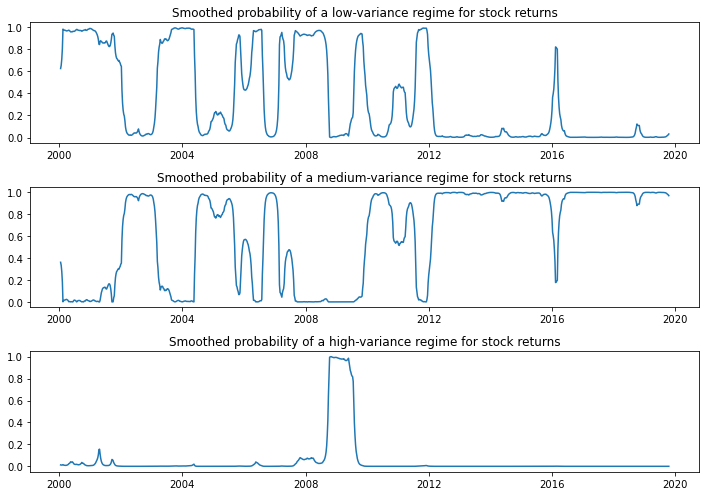

In [63]:
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()